<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Elizabeth!

I'm happy to review your project today 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments. If you have any questions, don't hesitate to respond to my comments in a different section.
    
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>     


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
 
Hello Elizabeth, 
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, I’ve returned it with some feedback to help you make the necessary improvements. You can find my more detailed feedaback within your project file in the `Reviewer's comment v1` section.
    
Keep in mind that revisions are a normal and valuable part of the learning process. Use this feedback to refine your work and resubmit when you’re ready. I know you’re capable of great things, and I’m here to support you every step of the way. Keep going—you’re doing a great job! 🏄
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2</b>
    
<b>General Feedback</b> 
    
Thank you for going an extra mile and making changes in your project.

Now everything is perfect. No critial issues left, so your project has been accepted!
    
Wish you cool projects in the next sprints! ☘️   

# Ice Games Data Analysis for 2017 Campaign - Integrated Project 1

In this project we will dive into the data from game sales through 2016.  Based on this data we can identify patterns to help determine the best games and platforms to target to optimize sales as well as factors that may help provide greater success regionally.

Below is the description of the columns in our original data set.

Data description

—Name 

—Platform 

—Year_of_Release 

—Genre 

—NA_sales (North American sales in USD million) 

—EU_sales (sales in Europe in USD million) 

—JP_sales (sales in Japan in USD million) 

—Other_sales (sales in other countries in USD million) 

—Critic_Score (maximum of 100) 

—User_Score (maximum of 10) 

—Rating (ESRB)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you've added information about the project goal. Could be also helpful to share steps you will complete.

</div>

# Step 1. Open the data Files and Necessary Libraries

In [1]:
# Import needed Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [2]:
# Import data set
games_df = pd.read_csv('/datasets/games.csv')

In [3]:
games_df.info()
games_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2565,Deca Sports 2,Wii,2009.0,Sports,0.31,0.33,0.09,0.07,49.0,tbd,E
8338,Conception II: Children of the Seven Stars,PSV,2013.0,Role-Playing,0.10,0.00,0.04,0.03,62.0,7.6,M
7306,NBA,PSP,2005.0,Sports,0.20,0.00,0.00,0.02,57.0,6.9,E
9167,Monster Hunter Diary: Poka Poka Airou Village DX,3DS,2015.0,Action,0.00,0.00,0.14,0.00,NaN,NaN,NaN
16648,Mushi Bugyou,3DS,2013.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN


# Step 2. Prepare the Data

First we will make sure all the column names are lowercase.  Then we will dig into missing values and duplicates as well as making sure all the data types are appropriate.

In [4]:
games_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
#make all column names lowercase
games_df = games_df.rename(columns={
    'Name': 'name',
    'Platform' : 'platform',
    'Year_of_Release' : 'year_of_release',
    'Genre' : 'genre',
    'NA_sales' : 'na_sales',
    'EU_sales' : 'eu_sales',
    'JP_sales' : 'jp_sales',
    'Other_sales' : 'other_sales',
    'Critic_Score' : 'critic_score',
    'User_Score' : 'user_score',
    'Rating': 'rating'
})
games_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Regarding the column names change, everything is correct. The most typical approach is to use snake case first_name. You can read about it here - https://levelup.gitconnected.com/case-styles-in-python-fd9591e57f86 

You could also update columns in the following way:
    
`df.columns = df.columns.str.lower()`

Now we will dig deeper into the missing values and clean up the data as needed.

In [6]:
#missing values
print(games_df.isna().sum())
# calculating missing values

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Could you please first check the total amount of missing values in each column but also look at the percentage of missing values. It helps to understand the overall impact. You can check percentage using, for example, this code:
   

    df.isnull().sum()/len(df)

    Or you can even make a dataframe of of it using to_frame

    mis_values = df.isnull().sum().to_frame('missing_values')
    mis_values['%'] = round(df.isnull().sum()/len(df),3)
    mis_values.sort_values(by='%', ascending=False)
</div>


In [7]:
print(games_df.isnull().sum()/len(games_df)) #finding the percentage of missing values

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64


Here we can see in more detail that there is no missing data for platform or sales.  There is very little data missing from name or genre, so we can likely drop these without it affecting our data too much.  There is more missing values for the year_of_release, but it is still less than 2% of our data and later on we will want to analyze more in depth how year of release affects sales. Therefore, we will leave these as blank values. As for critic_scores and user_scores, over 40% of the data is missing.  We will have to dig deeper as to why these values are missing and how we want to fill them for our calculations.  There is also a significant amount of ratings that are missing values.  We can replace these with 'unknown'. 

In [8]:
games_df = games_df.dropna(subset=['name', 'genre'])
games_df['rating'] = games_df['rating'].fillna('unknown')
print(games_df.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64


Now we will dig into the values and missing values in both our score categories. 

In [9]:
games_df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

There are missing values as well as values of "tbd" in this column.  To handle the values of "tbd" we will want to convert them to missing values.  Then we will want to get the descriptive stats of this column with the describe() method to determine if it is best to fill the missing values with the mean or the median.

In [10]:
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)
games_df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Now that we have all numerical values or missing values, we have to change the data type to a float so that we can get the descriptive statistics so we best know how to fill our missing values.

In [11]:
#change data types to the required types
# user_score: float64

games_df['user_score'] = games_df['user_score'].astype(float)
print(games_df['user_score'].dtype)

float64


In [12]:
print(games_df['user_score'].describe()) 

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


Because the mean and median are relatively close, it shows that there aren't too many significant outliers, which makes sense as the ratings can only fall between 0 and 10.  Therefore, I will fill the missing values with the mean score for our calculations as we can assume the average will likely fall around here.

In [13]:
games_df['user_score'] = games_df['user_score'].fillna(7.13) #I rounded to 2 decimals
print(games_df.isna().sum())
print(games_df['user_score'].unique())
print(games_df['user_score'].dtype)

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score            0
rating                0
dtype: int64
[8.   7.13 8.3  8.5  6.6  8.4  8.6  7.7  6.3  7.4  8.2  9.   7.9  8.1
 8.7  7.1  3.4  5.3  4.8  3.2  8.9  6.4  7.8  7.5  2.6  7.2  9.2  7.
 7.3  4.3  7.6  5.7  5.   9.1  6.5  8.8  6.9  9.4  6.8  6.1  6.7  5.4
 4.   4.9  4.5  9.3  6.2  4.2  6.   3.7  4.1  5.8  5.6  5.5  4.4  4.6
 5.9  3.9  3.1  2.9  5.2  3.3  4.7  5.1  3.5  2.5  1.9  3.   2.7  2.2
 2.   9.5  2.1  3.6  2.8  1.8  3.8  0.   1.6  9.6  2.4  1.7  1.1  0.3
 1.5  0.7  1.2  2.3  0.5  1.3  0.2  0.6  1.4  0.9  1.   9.7 ]
float64


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>

Great that you've checked and filled the missing values for all columns.

Now we have to do the same thing for critic_scores and fill the missing values appropriately. 

In [14]:
print(games_df['critic_score'].describe())

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


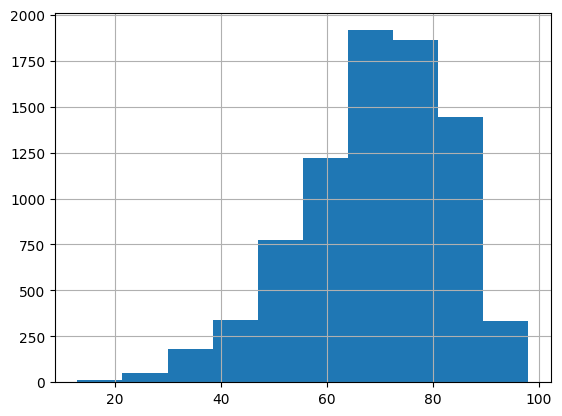

In [15]:
games_df['critic_score'].hist()
plt.show()
#plotting a quick histogram to see if the data is very skewed as the SD is fairly large but the mean and median are only 1 away from each other

Here we can see that the data may be slightly skewed, but it seems close enough to a normal distribution to use the mean.

In [16]:
games_df['critic_score'] = games_df['critic_score'].fillna(69.00) #I rounded to 2 decimals
print(games_df.isna().sum())
print(games_df['critic_score'].dtype)

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64
float64


Now that we have dealt with all of our missing values we want to ensure that there are no duplicate rows.

In [17]:
print(games_df.duplicated().sum())# counting duplicate rows

0


This tells us that there are no duplicate rows. Next we will want to make sure that there are no accidental duplicates, especially in the names and platform columns. There could be potential accidental duplicates here if there are misspelled words or some areas have capital letters and some don't.  We want to make sure that for platform all of the different types are appropriately categorized for our analysis later on.

In [18]:
print(games_df['name'].value_counts())

Need for Speed: Most Wanted     12
FIFA 14                          9
Ratatouille                      9
LEGO Marvel Super Heroes         9
Madden NFL 07                    9
                                ..
Canvas 2                         1
Bleach: Heat the Soul            1
Conker's Bad Fur Day             1
Invizimals: The Lost Kingdom     1
Duke Nukem: Zero Hour            1
Name: name, Length: 11559, dtype: int64


In [19]:
print(games_df.query("name == 'Need for Speed: Most Wanted'"))

                              name platform  year_of_release   genre  \
253    Need for Speed: Most Wanted      PS2           2005.0  Racing   
523    Need for Speed: Most Wanted      PS3           2012.0  Racing   
1190   Need for Speed: Most Wanted     X360           2012.0  Racing   
1591   Need for Speed: Most Wanted     X360           2005.0  Racing   
1998   Need for Speed: Most Wanted       XB           2005.0  Racing   
2048   Need for Speed: Most Wanted      PSV           2012.0  Racing   
3581   Need for Speed: Most Wanted       GC           2005.0  Racing   
5972   Need for Speed: Most Wanted       PC           2005.0  Racing   
6273   Need for Speed: Most Wanted     WiiU           2013.0  Racing   
6410   Need for Speed: Most Wanted       DS           2005.0  Racing   
6473   Need for Speed: Most Wanted      GBA           2005.0  Racing   
11715  Need for Speed: Most Wanted       PC           2012.0  Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score 

Here we can clearly see that while the name is duplicated, it is different versions of the game, so we do not have to worry about these duplicates.

In [20]:
print(games_df['platform'].value_counts())

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


Going through the platforms it doesn't seem like there are any implicit duplicates, so grouping by platform will be accurate.  Later on we may want to add a column that groups the platforms into their developer groups such as Sony or Nintendo, but we will see if that will be necessary.

In cleaning up the data we saw that most of the missing values were in user and critic scores as well as ratings. Scores could have been missing or TBD possibly due to being too new to have enough data to assign a score, or not popular enough.  ESRB ratings didn't come out until 1994, so some games that came out before that may not have had ratings. 

# Step 3. Analyze the Data

In [21]:
#Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games_df.info()
games_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1800,Need for Speed Underground 2,GC,2004.0,Racing,0.70,0.39,0.01,0.03,69.0,7.13,unknown,1.13
8932,Space Camp,DS,2009.0,Action,0.14,0.00,0.00,0.01,69.0,7.13,E,0.15
6265,NHL Hitz 20-02,XB,2001.0,Sports,0.20,0.06,0.00,0.01,79.0,8.70,E,0.27
10510,Doom 3,PC,2004.0,Shooter,0.05,0.04,0.00,0.01,87.0,7.60,M,0.10
10248,Panzer Dragoon Saga,SAT,1997.0,Role-Playing,0.00,0.00,0.11,0.00,69.0,7.13,unknown,0.11


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Great, everything is correct here. 



In this next section we will start to analyze the data at a deeper level to gain insights on different trends and correlations.  First we'll look at the years of release and get a better understanding of when games were released and how that affects current sales.

In [22]:
print(games_df['year_of_release'].describe())
print(games_df['year_of_release'].value_counts())

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64


In the information we above we can see that the data is very much skewed as there are a lot more games that were released after the 2000s than there was previously.  Therefore, it may be beneficial to group the games by time periods or "era" as we'll call them, so we can get more information on sales in each era.

In [23]:
def era_group(year):
    """
    The function returns the era group for games according to the year of release, using the following rules:
    —'retro'   for year < 2000
    —'modern'  for 2000 <= year < 2013
    —'recent'  for year >= 2013
    —'unknown' for missing year values (NaN)
    """

    if year < 2000:
        return 'retro'
    elif year < 2013:
        return 'modern'
    elif year >= 2013:
        return 'recent'
    else:
        return 'unknown'
    

games_df['era_group'] = games_df['year_of_release'].apply(era_group)
print(games_df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0        8.00        E   
1      3.58      6.81         0.77          69.0        7.13  unknown   
2     12.76      3.79         3.29          82.0        8.30        E   
3     10.93      3.28         2.95          80.0        8.00        E   
4      8.89     10.22         1.00          69.0        7.13  unknown   

   total_sales era_group  
0        82.54    modern  
1        40.24     r

In [24]:
print(games_df['era_group'].value_counts())

modern     12237
recent      2233
retro       1974
unknown      269
Name: era_group, dtype: int64


As expected a large majority of the games fall into the recent or modern categories.  Next we will look into how sales vary per platform and we can see if year of release of the platform affects the total sales.

In [25]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']
print(games_df.sample(5))

                                           name platform  year_of_release  \
9170   Ecco the Dolphin: Defender of the Future      PS2           2002.0   
10022                       Doukoku Shoshite...      SAT           1998.0   
6550                                  Puppeteer      PS3           2013.0   
4902                                    FIFA 12      3DS           2011.0   
7613                      IHRA Drag Racing 2004       XB           2003.0   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
9170   Adventure      0.07      0.05      0.00         0.02          71.0   
10022  Adventure      0.00      0.00      0.11         0.00          69.0   
6550    Platform      0.11      0.08      0.02         0.04          80.0   
4902      Sports      0.08      0.26      0.00         0.05          69.0   
7613      Racing      0.15      0.04      0.00         0.01          40.0   

       user_score   rating  total_sales era_group  
9170         8.50     

In [26]:
sales_by_era = games_df.groupby('era_group')['total_sales'].sum()
print(sales_by_era)

era_group
modern     6068.46
recent     1090.69
retro      1655.22
unknown      98.92
Name: total_sales, dtype: float64


Here we can see that total sales for games classified as retro and unknown are significantly less than the modern and recent groups.  This could very likely be due to the fact that there are less of them to begin with.

In [27]:
print(games_df['platform'].describe())
print()
print(games_df['platform'].value_counts())

count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


In [28]:
games_df['platform_sales'] = games_df.groupby('platform')['total_sales'].transform('sum')
print(games_df.sample(5))

                                name platform  year_of_release         genre  \
10196                Bionicle Heroes       GC           2006.0       Shooter   
3177   Dragon Quest Monsters Joker 3      3DS           2016.0  Role-Playing   
6354        Ratatouille: Food Frenzy       DS           2007.0        Puzzle   
9878           Deepak Chopra's Leela     X360           2011.0          Misc   
15360                    Kill.Switch      GBA           2004.0       Shooter   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
10196      0.08      0.02      0.00         0.00          51.0        5.20   
3177       0.00      0.00      0.63         0.00          69.0        7.13   
6354       0.25      0.00      0.00         0.02          69.0        7.13   
9878       0.07      0.04      0.00         0.01          69.0        3.50   
15360      0.02      0.01      0.00         0.00          69.0        7.13   

        rating  total_sales era_group  platform_sa

In [29]:
#next we will want to Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. 
#How long does it generally take for new platforms to appear and old ones to fade?

count    16713.000000
mean       640.796487
std        385.716915
min          0.030000
25%        259.520000
50%        730.860000
75%        939.650000
max       1255.770000
Name: platform_sales, dtype: float64

1255.77    2161
806.12     2151
939.65     1331
907.51     1320
971.42     1262
294.05     1209
730.86     1197
259.52      974
257.74      824
317.85      822
198.93      556
259.00      520
54.07       430
314.14      392
218.68      319
159.32      247
200.04      239
33.59       173
82.19       147
96.98       133
255.46       98
251.05       98
15.95        52
28.35        27
1.44         12
1.86          6
1.42          6
0.10          3
0.16          2
0.04          1
0.03          1
Name: platform_sales, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x7fad435c87c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fad435c8e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fad435c8460>],
 'medians': [<matplotlib.lines.Line2D at 0x7fad435b9670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fad435b98b0>],
 'means': []}

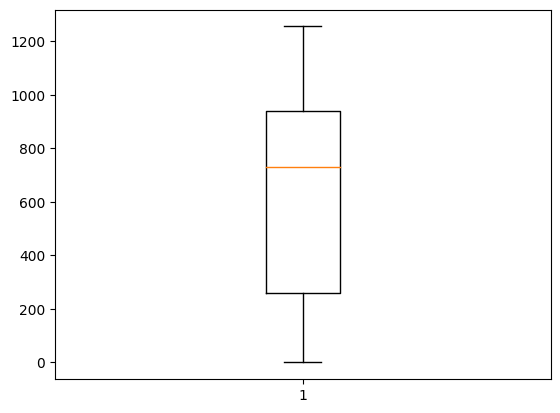

In [30]:
print(games_df['platform_sales'].describe())
print()
print(games_df['platform_sales'].value_counts())

plt.boxplot(games_df['platform_sales'])

In [31]:
# Step 1: Filter the dataset where platform_sales >= 939.65
top_platform_sales = games_df.query("platform_sales >= 939.65")

# Step 2: Group by platform and sum the platform_sales
top_platform_sales = top_platform_sales.groupby('platform')['platform_sales'].sum().reset_index()
print(top_platform_sales)

  platform  platform_sales
0      PS2      2713718.97
1     X360      1225932.04


When filtering out by just the top quarter of sales we can see that only the PS2 and X360.  If we want to expand we can look at the top half of platform sales. 

In [32]:
# Step 1: Filter the dataset where platform_sales >= 730.86
top_platform_sales = games_df.query("platform_sales >= 730.86")

# Step 2: Group by platform and sum the platform_sales
top_platform_sales = top_platform_sales.groupby('platform')['platform_sales'].sum().reset_index()
print(top_platform_sales)

  platform  platform_sales
0       DS      1733964.12
1      PS2      2713718.97
2      PS3      1250674.15
3      Wii      1197913.20
4     X360      1225932.04


Here we can see that our top 5 selling platforms are the DS, PS2, PS3, Wii and X360.  Now we will want to build extract the data around these 5 platforms so we can build distributions. 

In [33]:
#Games filtered by DS 
ds_df = games_df.query("platform == 'DS'")
print(ds_df.head())

                                            name platform  year_of_release  \
6                          New Super Mario Bros.       DS           2006.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS           2005.0   
19  Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   
20                 Pokemon Diamond/Pokemon Pearl       DS           2006.0   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
6       Platform     11.28      9.14      6.50         2.88          89.0   
10    Simulation      9.05     10.95      1.93         2.74          69.0   
11        Racing      9.71      7.47      4.13         1.90          91.0   
19          Misc      4.74      9.20      4.16         2.04          77.0   
20  Role-Playing      6.38      4.46      6.04         1.36          69.0   

    user_score   rating  total_sales era_group  platform_sales  
6  

In [34]:
#Games filtered by PS2 
ps2_df = games_df.query("platform == 'PS2'")
print(ps2_df.head())

                             name platform  year_of_release   genre  na_sales  \
17  Grand Theft Auto: San Andreas      PS2           2004.0  Action      9.43   
24    Grand Theft Auto: Vice City      PS2           2002.0  Action      8.41   
28         Gran Turismo 3: A-Spec      PS2           2001.0  Racing      6.85   
38           Grand Theft Auto III      PS2           2001.0  Action      6.99   
48                 Gran Turismo 4      PS2           2004.0  Racing      3.01   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
17      0.40      0.41        10.57          95.0         9.0      M   
24      5.49      0.47         1.78          95.0         8.7      M   
28      5.09      1.87         1.16          95.0         8.4      E   
38      4.51      0.30         1.30          97.0         8.5      M   
48      0.01      1.10         7.53          89.0         8.5      E   

    total_sales era_group  platform_sales  
17        20.81    modern         12

In [35]:
#Games filtered by PS2 
ps2_df = games_df.query("platform == 'PS2'")
print(ps2_df.head())

                             name platform  year_of_release   genre  na_sales  \
17  Grand Theft Auto: San Andreas      PS2           2004.0  Action      9.43   
24    Grand Theft Auto: Vice City      PS2           2002.0  Action      8.41   
28         Gran Turismo 3: A-Spec      PS2           2001.0  Racing      6.85   
38           Grand Theft Auto III      PS2           2001.0  Action      6.99   
48                 Gran Turismo 4      PS2           2004.0  Racing      3.01   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
17      0.40      0.41        10.57          95.0         9.0      M   
24      5.49      0.47         1.78          95.0         8.7      M   
28      5.09      1.87         1.16          95.0         8.4      E   
38      4.51      0.30         1.30          97.0         8.5      M   
48      0.01      1.10         7.53          89.0         8.5      E   

    total_sales era_group  platform_sales  
17        20.81    modern         12

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Please don't forget to use `head`, `tail` or `sample` when showing dataframes. If you leave this table "as is", then when you save the notebook, for example, on github, the table will expand to its full length and take up a significant part of the report.

I updated all the dataframes I created below to print just the head() for a sample. 

In [36]:
#Games filtered by PS3 
ps3_df = games_df.query("platform == 'PS3'")
print(ps3_df.head())

                              name platform  year_of_release    genre  \
16              Grand Theft Auto V      PS3           2013.0   Action   
34      Call of Duty: Black Ops II      PS3           2012.0  Shooter   
37  Call of Duty: Modern Warfare 3      PS3           2011.0  Shooter   
41         Call of Duty: Black Ops      PS3           2010.0  Shooter   
54                  Gran Turismo 5      PS3           2010.0   Racing   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16      7.02      9.09      0.98         3.96          97.0         8.2   
34      4.99      5.73      0.65         2.42          83.0         5.3   
37      5.54      5.73      0.49         1.57          88.0         3.2   
41      5.99      4.37      0.48         1.79          88.0         6.4   
54      2.96      4.82      0.81         2.11          84.0         7.5   

   rating  total_sales era_group  platform_sales  
16      M        21.05    recent          939.65  
34      

In [37]:
#Games filtered by Wii 
wii_df = games_df.query("platform == 'Wii'")
print(wii_df.head())

                        name platform  year_of_release     genre  na_sales  \
0                 Wii Sports      Wii           2006.0    Sports     41.36   
2             Mario Kart Wii      Wii           2008.0    Racing     15.68   
3          Wii Sports Resort      Wii           2009.0    Sports     15.61   
7                   Wii Play      Wii           2006.0      Misc     13.96   
8  New Super Mario Bros. Wii      Wii           2009.0  Platform     14.44   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
7      9.18      2.93         2.84          58.0         6.6      E   
8      6.94      4.70         2.24          87.0         8.4      E   

   total_sales era_group  platform_sales  
0        82.54    modern          907.51  
2        35.52    

In [38]:
#Games filtered by X360 
x360_df = games_df.query("platform == 'X360'")
print(x360_df.head())

                              name platform  year_of_release    genre  \
14              Kinect Adventures!     X360           2010.0     Misc   
23              Grand Theft Auto V     X360           2013.0   Action   
29  Call of Duty: Modern Warfare 3     X360           2011.0  Shooter   
32         Call of Duty: Black Ops     X360           2010.0  Shooter   
35      Call of Duty: Black Ops II     X360           2012.0  Shooter   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
14     15.00      4.89      0.24         1.69          61.0         6.3   
23      9.66      5.14      0.06         1.41          97.0         8.1   
29      9.04      4.24      0.13         1.32          88.0         3.4   
32      9.70      3.68      0.11         1.13          87.0         6.3   
35      8.25      4.24      0.07         1.12          83.0         4.8   

   rating  total_sales era_group  platform_sales  
14      E        21.82    modern          971.42  
23      

Now we can use this information to build distributions based on the total sales per year for each of these top selling platforms. First we will start with the xbox 360 sales.

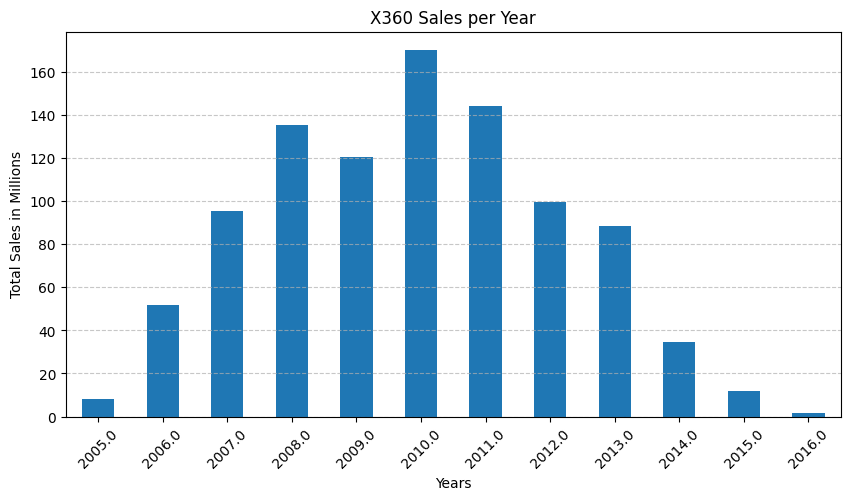

In [39]:
# Group by year_of_release and sum total_sales
x360_df_grouped = x360_df.groupby('year_of_release', as_index=False)['total_sales'].sum()

# Plot as a bar chart
x360_df_grouped.plot(
    x='year_of_release',
    y='total_sales',
    kind='bar',
    title='X360 Sales per Year',
    xlabel='Years',
    ylabel='Total Sales in Millions',
    legend=False,  
    figsize=(10, 5) 
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add light grid lines for readability
plt.show()

On going through a few different visualizations, I decided that a bar graph best shows the trend of total sales per year. Here we can see that popularity/sales peaked about 3-5 years after it came on to the scene.  Then sales started to fad out over the last 3 years (almost 9 years after it came on to the scene).

Now we will go through this data for our other top selling platforms.

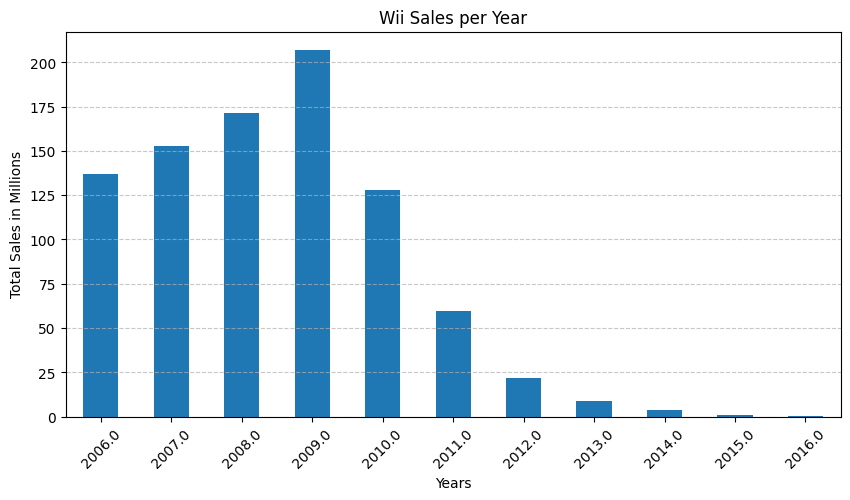

In [40]:
# Group by year_of_release and sum total_sales
wii_df_grouped = wii_df.groupby('year_of_release', as_index=False)['total_sales'].sum()

# Plot as a bar chart
wii_df_grouped.plot(
    x='year_of_release',
    y='total_sales',
    kind='bar',
    title='Wii Sales per Year',
    xlabel='Years',
    ylabel='Total Sales in Millions',
    legend=False,  
    figsize=(10, 5) 
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

For the wii we can see that it took off right away with high sales in its first year of release.  It hit it's peak in popularity and sales 3 years after it hit the market in 2006.  Since it's peak popularity in 2009 sales have been significantly dropping off to near 0 in 2016.  The platform seemed to really start to fade starting in 2012, 6 years after initially released.

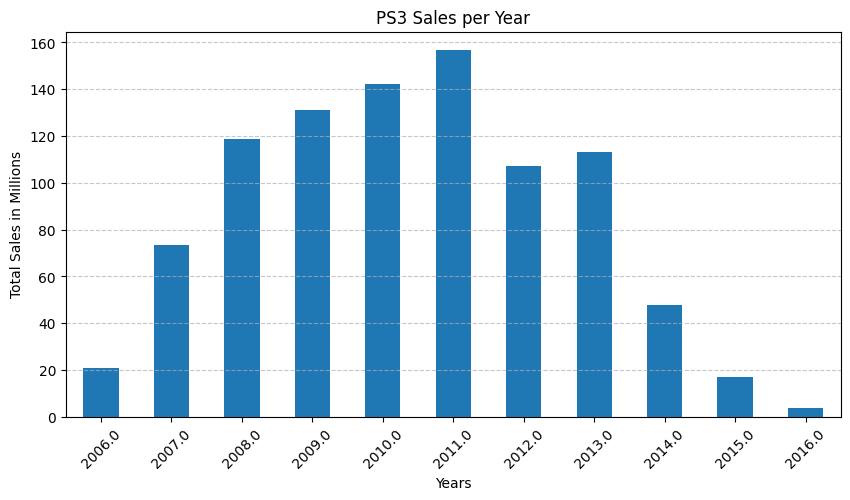

In [41]:
# Group by year_of_release and sum total_sales
ps3_df_grouped = ps3_df.groupby('year_of_release', as_index=False)['total_sales'].sum()

# Plot as a bar chart
ps3_df_grouped.plot(
    x='year_of_release',
    y='total_sales',
    kind='bar',
    title='PS3 Sales per Year',
    xlabel='Years',
    ylabel='Total Sales in Millions',
    legend=False,  
    figsize=(10, 5) 
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

For the PS3 you can see a similar trend to the xbox 360 that it took a year or two after it's release to really gain popularity.  It had it's greatest peak in sales in 2011, 5 years after it's release.  Sales again started to fad about 8-10 years after it's initial release. 

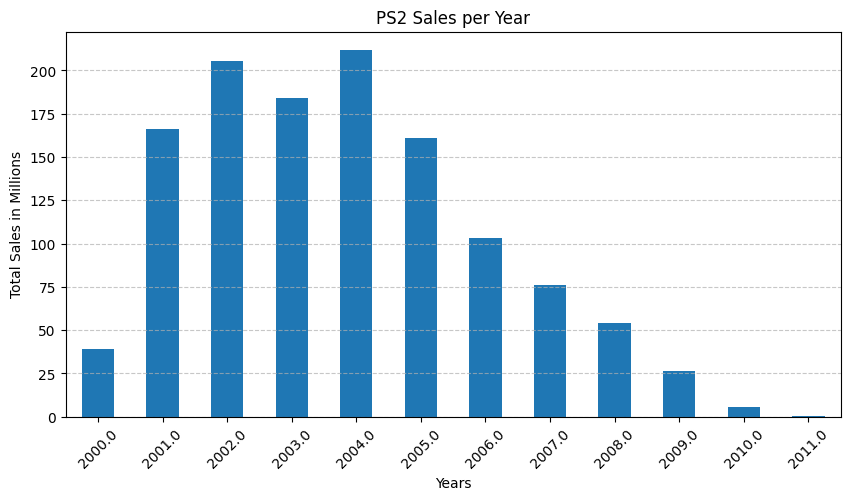

In [42]:
# Group by year_of_release and sum total_sales
ps2_df_grouped = ps2_df.groupby('year_of_release', as_index=False)['total_sales'].sum()

# Plot as a bar chart
ps2_df_grouped.plot(
    x='year_of_release',
    y='total_sales',
    kind='bar',
    title='PS2 Sales per Year',
    xlabel='Years',
    ylabel='Total Sales in Millions',
    legend=False,  
    figsize=(10, 5) 
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

The PS2 took a year to start to see sales pick up and then saw peak popularity in 2004, 4 years after it's release.  Although, this is the platform with our highest overall total sales, we can see that there are none after 2011. Sales really started to drop off after being on the market for 9-10 years.  This is something we will likely need to take into account when planning the marketing/sales strategy for 2017 as it appears that near 0 PS2 have been sold in the last 5 years.

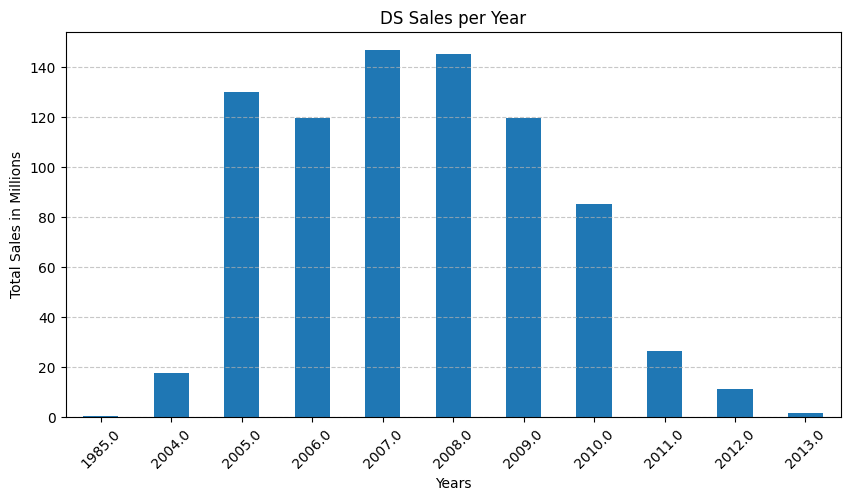

In [43]:
# Group by year_of_release and sum total_sales
ds_df_grouped = ds_df.groupby('year_of_release', as_index=False)['total_sales'].sum()

# Plot as a bar chart
ds_df_grouped.plot(
    x='year_of_release',
    y='total_sales',
    kind='bar',
    title='DS Sales per Year',
    xlabel='Years',
    ylabel='Total Sales in Millions',
    legend=False,  
    figsize=(10, 5) 
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

The DS appeared on the scene in the 1980s, but did not do much.  They likely relaunched a new model in 2004 that seemed to take about a year to catch on.  Again it hit it's top sales in 2007, about 3 years after it's initial release. We start to see the platform sales fad in 2011, 7 years after it was released and hit 0 sales in 2014, 10 years after it was released.

In our 5 platforms with our greatest total sales, we can see that most of them have faded out or are trending towards fading out. Based on all 5 of these platforms, we can see the trend that the platform hits its peak sales within its first 3-5 years and starts to downtrend after 6-8 years and likely completely fall off after 10 years. Therefore, we would likely want to look at platforms that fall into the 'recent' era category and preferably are within the first 3-5 years of their release.

In [44]:
# Step 1: Filter the dataset where era_group == recent
recent_era_games = games_df.query("era_group == 'recent'")

# Step 2: Group by platform and sum the platform_sales
top_recent_platform_sales = recent_era_games.groupby('platform')['platform_sales'].sum().reset_index()
top_recent_platform_sales = top_recent_platform_sales.sort_values(by='platform_sales', ascending=False).reset_index(drop = True)
print(top_recent_platform_sales)

   platform  platform_sales
0       PS3       324179.25
1      X360       180684.12
2       PS4       123142.88
3       3DS        78477.00
4        PC        49049.28
5      XOne        39352.04
6       Wii        20872.73
7       PSP        19701.35
8       PSV        19357.06
9      WiiU         9451.85
10       DS         6448.96


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
It is uncommon to use data for more than 2-3 years when forecasting next year's sales, even in case of traditional businesses. And in the dynamic computer games industry, taking longer time intervals should be avoided as it will definitely lead to tracking some obsolete trends. But you shouldn't take too short a period either.
    
Here I can advice checking 2014-2016 / 2013-2016 to evaluate only latest data. 
    
Could you please share your thoughts or update that? 
   
    
Also you need to used filtered dataframe in the rest of the project.

I didn't realize that it is more common to utilize just 2-3 years.  I updated all of my results by changing my era filter (up in line 23) to make recent_era now consist of anything from 2013 or later.  Throughout the rest of the project I do use the filtered dataset recent_era_games except when looking at just the top platforms below.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>
 
Everything is correct and data has been filtered correctly, as we want to evaluate only recent trends. 

Here we can see our top 5 platforms on total sales do still fall in this list as they all have had games come out after 2010, but from our previous analysis many of these platforms seem to be trending downwards, if not already completely faded out and appear to be shrinking. We will want to analyze the trends of some of these other platforms. Before making bar charts for all 12 of these platforms. We can start by looking at the years of release for each of them and dig into the ones that were released within the last 3 years.

In [45]:
psp_release = games_df.query("platform == 'PSP'")['year_of_release'].min()
print('PSP year of release = ', psp_release)
ds3_release = games_df.query("platform == '3DS'")['year_of_release'].min()
print('3DS year of release = ', ds3_release)
pc_release = games_df.query("platform == 'PC'")['year_of_release'].min()
print('PC year of release = ', pc_release)
ps4_release = games_df.query("platform == 'PS4'")['year_of_release'].min()
print('PS4 year of release = ', ps4_release)
xone_release = games_df.query("platform == 'XOne'")['year_of_release'].min()
print('XOne year of release = ', xone_release)
psv_release = games_df.query("platform == 'PSV'")['year_of_release'].min()
print('PSV year of release = ', psv_release)
wiiu_release = games_df.query("platform == 'WiiU'")['year_of_release'].min()
print('WiiU year of release = ', wiiu_release)

PSP year of release =  2004.0
3DS year of release =  2011.0
PC year of release =  1985.0
PS4 year of release =  2013.0
XOne year of release =  2013.0
PSV year of release =  2011.0
WiiU year of release =  2012.0


Based on the year of release and our previous observations that sales seem to peak within the first 3 years of a platforms release, we will start our analysis with the PS4, and XOne and analyze those sales. We will filter the data set by each of these platforms, then create a bar graph to analyze their sales per year as we did for our other platforms above that appear to be shrinking. Prior to narrowing down our years of relevant data we focused on games released within the last 5 years, so there is also some analysis below of the 3DS, PSV and WiiU.

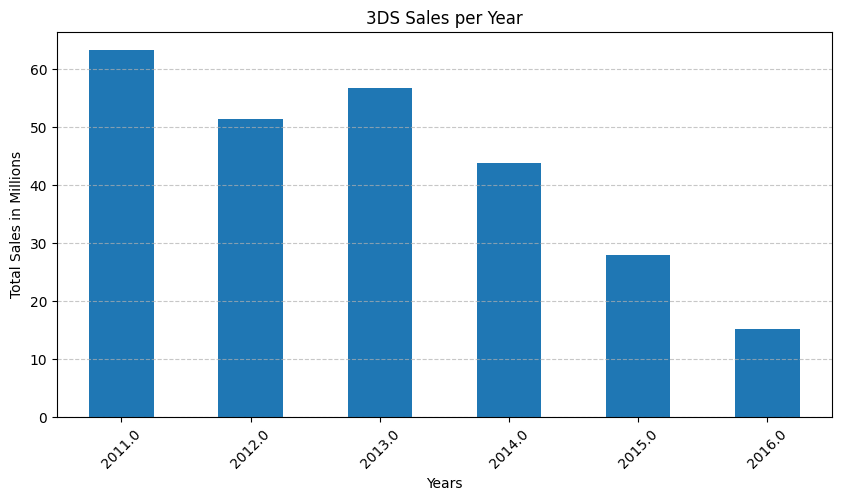

In [46]:
#Games filtered by 3DS 
ds3_df = games_df.query("platform == '3DS'")

# Group by year_of_release and sum total_sales
ds3_df_grouped = ds3_df.groupby('year_of_release', as_index=False)['total_sales'].sum()

# Plot as a bar chart
ds3_df_grouped.plot(
    x='year_of_release',
    y='total_sales',
    kind='bar',
    title='3DS Sales per Year',
    xlabel='Years',
    ylabel='Total Sales in Millions',
    legend=False,  
    figsize=(10, 5) 
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

Based on this graph we can see that 3DS sales seem to be shrinking as well and may not be our most profitable platform.

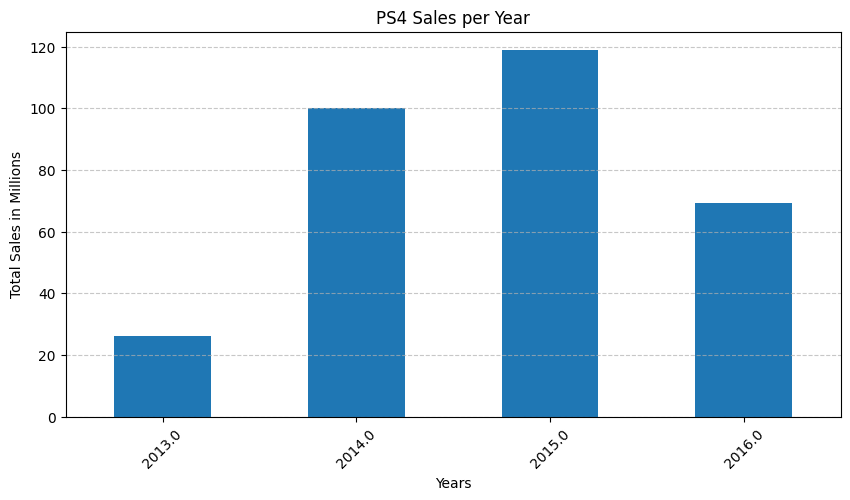

In [47]:
#Games filtered by PS4 
ps4_df = games_df.query("platform == 'PS4'")

# Group by year_of_release and sum total_sales
ps4_df_grouped = ps4_df.groupby('year_of_release', as_index=False)['total_sales'].sum()

# Plot as a bar chart
ps4_df_grouped.plot(
    x='year_of_release',
    y='total_sales',
    kind='bar',
    title='PS4 Sales per Year',
    xlabel='Years',
    ylabel='Total Sales in Millions',
    legend=False,  
    figsize=(10, 5) 
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

Based on this graph, it appears that PS4 sales are downtrending, but were still over 60 million last year, so may still be very profitable in 2017.

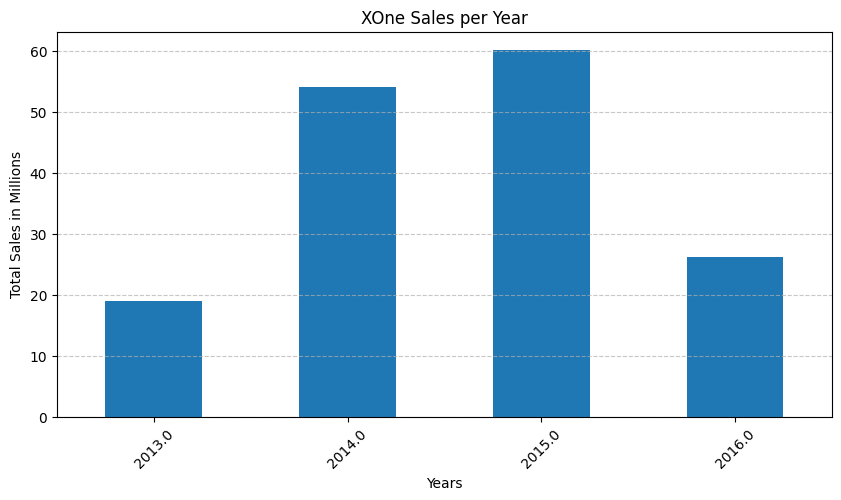

In [48]:
#Games filtered by XOne
xone_df = games_df.query("platform == 'XOne'")

# Group by year_of_release and sum total_sales
xone_df_grouped = xone_df.groupby('year_of_release', as_index=False)['total_sales'].sum()

# Plot as a bar chart
xone_df_grouped.plot(
    x='year_of_release',
    y='total_sales',
    kind='bar',
    title='XOne Sales per Year',
    xlabel='Years',
    ylabel='Total Sales in Millions',
    legend=False,  
    figsize=(10, 5) 
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

The Xone sales also appear to be downtrending, but is over 20 million in total sales. This platform may be a potential, but is likely starting to fade based on the trends we observed in other platforms.

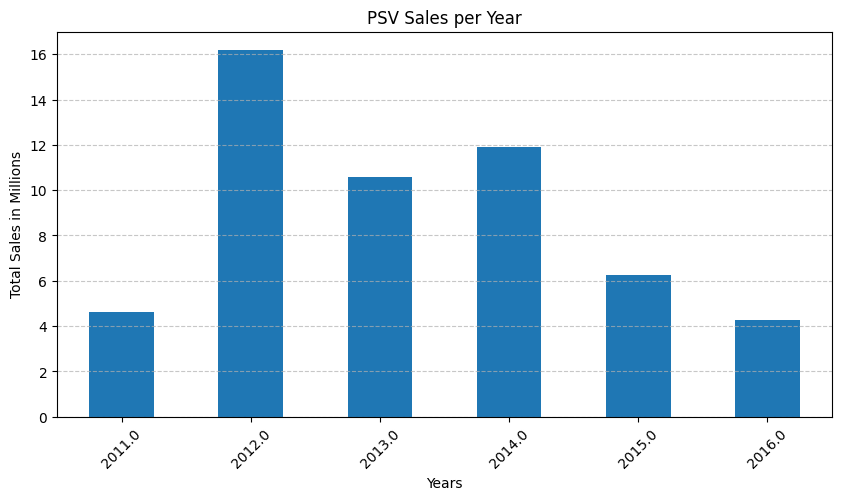

In [49]:
#Games filtered by PSV 
psv_df = games_df.query("platform == 'PSV'")

# Group by year_of_release and sum total_sales
psv_df_grouped = psv_df.groupby('year_of_release', as_index=False)['total_sales'].sum()

# Plot as a bar chart
psv_df_grouped.plot(
    x='year_of_release',
    y='total_sales',
    kind='bar',
    title='PSV Sales per Year',
    xlabel='Years',
    ylabel='Total Sales in Millions',
    legend=False,  
    figsize=(10, 5) 
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

The PSV sales also appear to be downtrending and were just over 4 million in 2016.

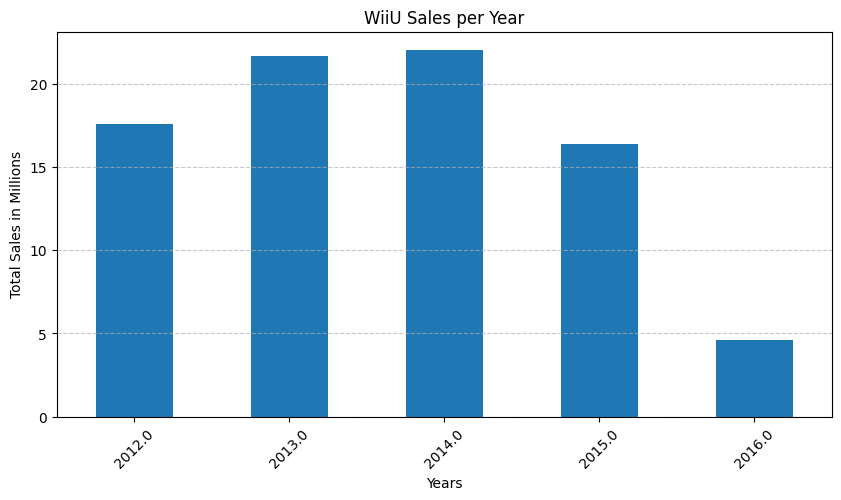

In [50]:
#Games filtered by WiiU 
wiiu_df = games_df.query("platform == 'WiiU'")

# Group by year_of_release and sum total_sales
wiiu_df_grouped = wiiu_df.groupby('year_of_release', as_index=False)['total_sales'].sum()

# Plot as a bar chart
wiiu_df_grouped.plot(
    x='year_of_release',
    y='total_sales',
    kind='bar',
    title='WiiU Sales per Year',
    xlabel='Years',
    ylabel='Total Sales in Millions',
    legend=False,  
    figsize=(10, 5) 
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

The WiiU sales seem to be downtrending as well. 

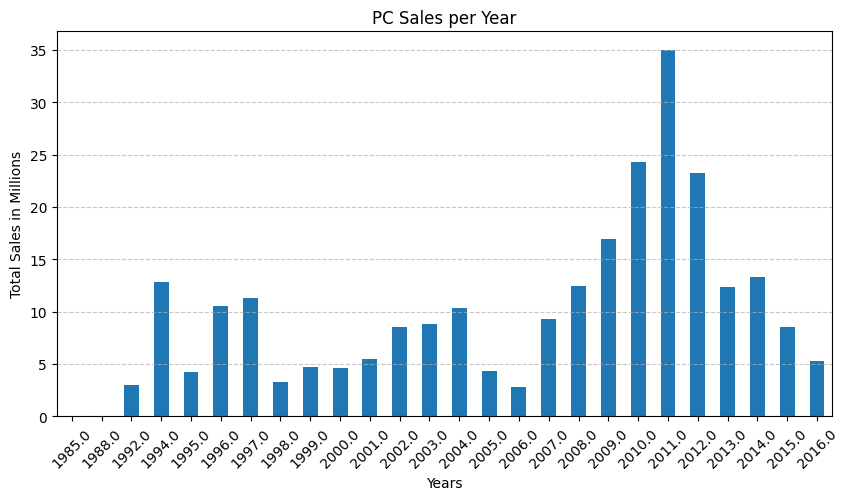

In [51]:
#Games filtered by PC
pc_df = games_df.query("platform == 'PC'")

# Group by year_of_release and sum total_sales
pc_df_grouped = pc_df.groupby('year_of_release', as_index=False)['total_sales'].sum()

# Plot as a bar chart
pc_df_grouped.plot(
    x='year_of_release',
    y='total_sales',
    kind='bar',
    title='PC Sales per Year',
    xlabel='Years',
    ylabel='Total Sales in Millions',
    legend=False,  
    figsize=(10, 5) 
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Yes, looks like there were almost no games before 1995.

</div>

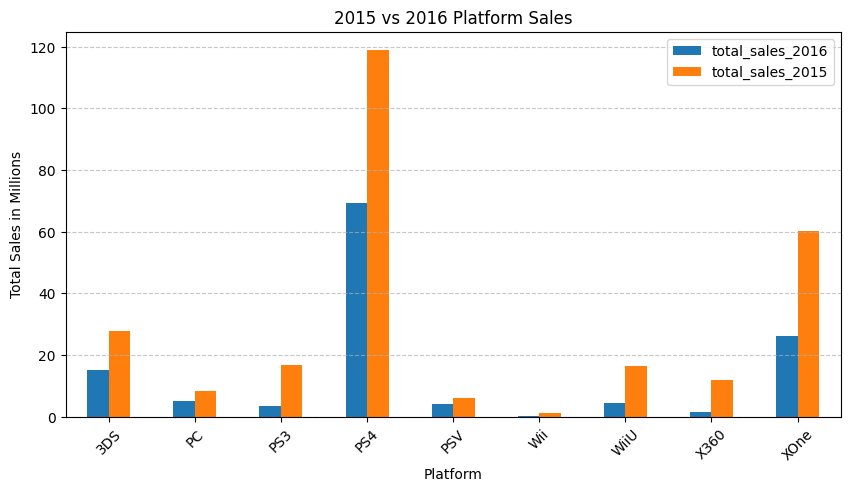

In [52]:
#Games filtered by 2016
games_2016_df = games_df.query("year_of_release == 2016")

# Group by platform and sum total_sales
platform_sales_2016 = games_2016_df.groupby('platform', as_index=False)['total_sales'].sum()

# Filter games by 2015
games_2015_df = games_df.query("year_of_release == 2015")

# Group by platform and sum total_sales for 2015
platform_sales_2015 = games_2015_df.groupby('platform', as_index=False)['total_sales'].sum()

# Merge 2015 and 2016 sales data on platform
merged_sales = pd.merge(platform_sales_2016, platform_sales_2015, on='platform', suffixes=('_2016', '_2015'))

# Plot as a bar chart with different colors for 2015 and 2016
merged_sales.plot(
    x='platform',
    y=['total_sales_2016', 'total_sales_2015'],
    kind='bar',
    title='2015 vs 2016 Platform Sales',
    xlabel='Platform',
    ylabel='Total Sales in Millions',
    figsize=(10, 5)
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on the review of this data it appears that there are no platforms with growing sales, but the PS4 still is very popular with sales >60 million and the XOne also still has sales over 20 million. Based on the data and current projections these are likely to be our most profitable platforms in 2017 unless a new game or games is released for a different system. 

Next we will build box plots for the global sales of all games, broken down by platform.

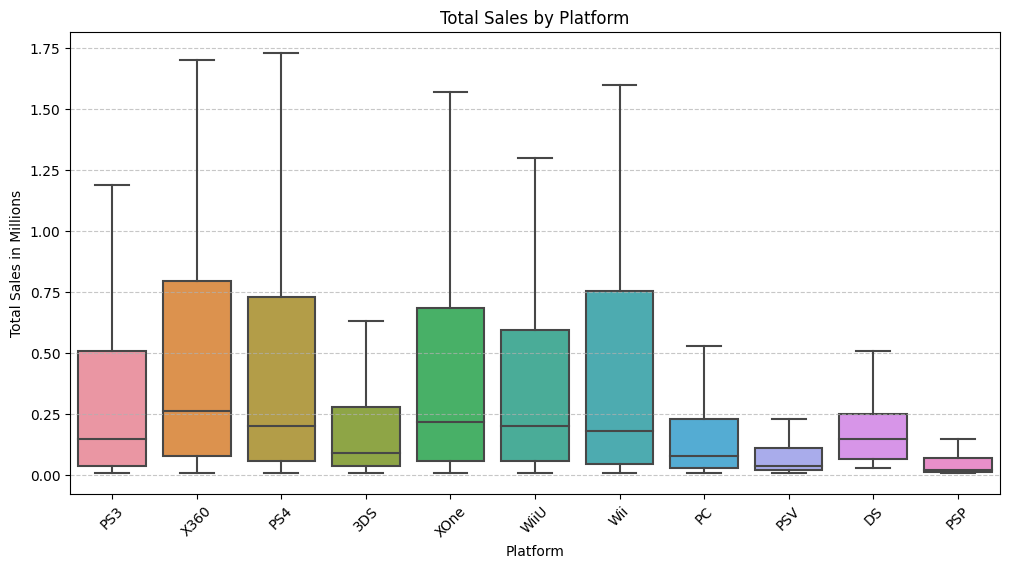

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data= recent_era_games, showfliers = False)
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales in Millions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

To better visualize the data we removed the outliers here. The median sales for the X360, PS3, PS4, XOne and WiiU are all around 1/4 of a millioin, while others like the DS, 3DS, PC, PSP, PSV and PS2 are much lower than that. There is also a lot of variability in the upper quartile and maximums from more popular platforms to less popular. 

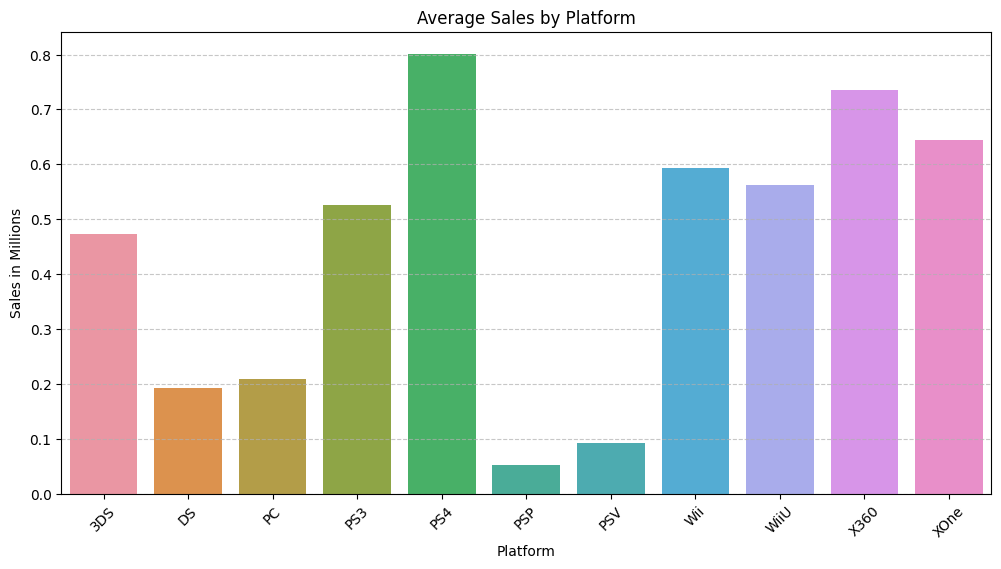

In [54]:
recent_era_games_average = recent_era_games.groupby('platform')['total_sales'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='platform', y='total_sales', data= recent_era_games_average)
plt.title('Average Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Sales in Millions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

For the average sales, I chose to represent the information in a bar graph as a box plot generally shows distributions. Here the differences in average sales appears to be less significant as all average sales are below a million dollars. However, more popular systems like the PS3, PS4 and the X360, have much higher average sales than less popular systems (during our recent era). 

Next we will look at how user and professional reviews affect sales for the PS4. 

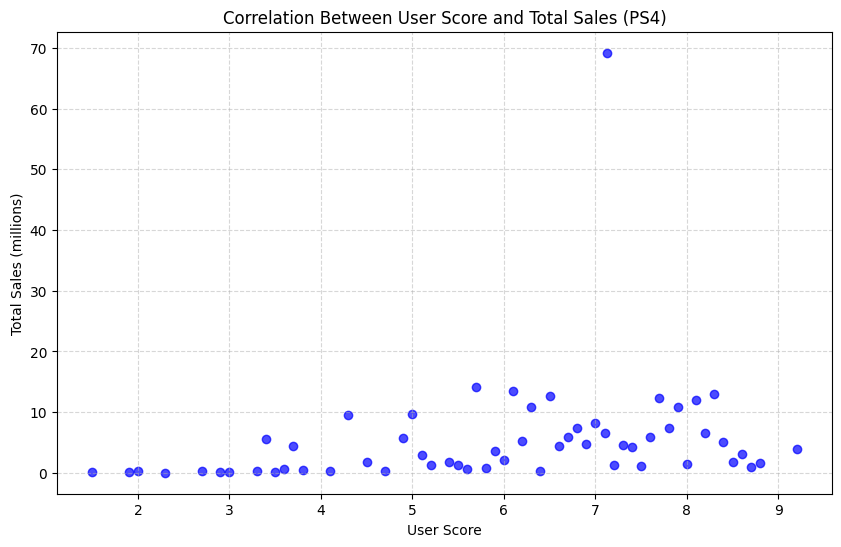

The correlation coefficient of the user scores to total sales is: 0.2584599241117017


In [55]:
ps4_sales_user_reviews = ps4_df.groupby('user_score', as_index=False)['total_sales'].sum()

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ps4_sales_user_reviews['user_score'], ps4_sales_user_reviews['total_sales'],  alpha=0.7, color='b')

# Labels and title
plt.title('Correlation Between User Score and Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

user_score_corr = ps4_sales_user_reviews['user_score'].corr(ps4_sales_user_reviews['total_sales'])
print('The correlation coefficient of the user scores to total sales is:', user_score_corr)

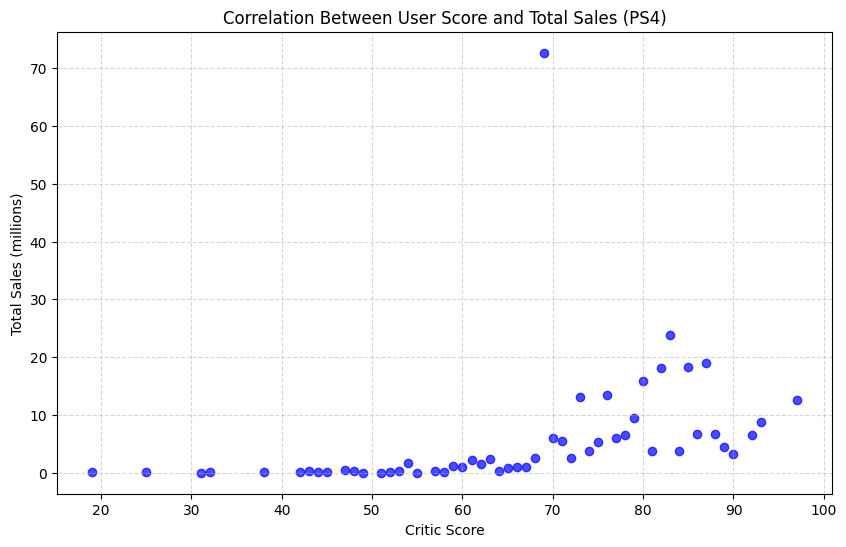

The correlation coefficient of the critic scores to total sales is: 0.37887846357640603


In [56]:
ps4_sales_critic_reviews = ps4_df.groupby('critic_score', as_index=False)['total_sales'].sum()

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ps4_sales_critic_reviews['critic_score'], ps4_sales_critic_reviews['total_sales'],  alpha=0.7, color='b')

# Labels and title
plt.title('Correlation Between User Score and Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

critic_score_corr = ps4_sales_critic_reviews['critic_score'].corr(ps4_sales_critic_reviews['total_sales'])
print('The correlation coefficient of the critic scores to total sales is:', critic_score_corr)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Well done! Very nice scatter plots.


As you can see the correlation between critic or user scores and sales is very low indicating that they have hardly any affect on game/platform sales.

Keeping your conclusions in mind, we will compare the sales of the games on PS4 with the same games on other platforms.

In [57]:
# Step 1: Identify games that exist on PS4
ps4_games = recent_era_games[recent_era_games['platform'] == 'PS4']['name'].unique()

# Step 2: Find multi-platform games that include PS4
multi_platform_games = recent_era_games[recent_era_games['name'].isin(ps4_games)]

# Step 3: Exclude games that are ONLY on PS4
multi_platform_games = multi_platform_games[multi_platform_games.duplicated('name', keep=False)]

# Step 4: Print to check if the filtering worked
print(multi_platform_games['name'].value_counts())
print(multi_platform_games['platform'].value_counts())
print(multi_platform_games.head(10))
print('-----------')
print(multi_platform_games.query("name == 'Call of Duty: Black Ops 3'"))

LEGO Marvel Super Heroes                9
FIFA 14                                 9
Lego Batman 3: Beyond Gotham            8
LEGO Jurassic World                     8
The LEGO Movie Videogame                8
                                       ..
Legend of Kay                           2
ZombiU                                  2
Singstar: Ultimate Party                2
The Elder Scrolls V: Skyrim             2
Sword Art Online: Hollow Realization    2
Name: name, Length: 316, dtype: int64
PS4     316
XOne    217
PS3     165
PC      105
X360    100
PSV      82
WiiU     35
3DS      19
Wii      10
PSP       2
DS        1
Name: platform, dtype: int64
                              name platform  year_of_release    genre  \
16              Grand Theft Auto V      PS3           2013.0   Action   
23              Grand Theft Auto V     X360           2013.0   Action   
31       Call of Duty: Black Ops 3      PS4           2015.0  Shooter   
42              Grand Theft Auto V      PS4    

Here we can see that we have filtered the list down to games that are available on our chosen platform (PS4) as well as at least one other platform as noted by the value counts of the names with the lowest being 2. Then we did further checking to ensure this with specific examples. There is still too much data here to make meaningul comparisons, so we will filter the games down to compare games that are on at least 8 platforms so we can see how sales vary across multiple platforms.

In [58]:
# Step 1: Count how many platforms each game appears on
platform_counts = multi_platform_games.groupby('name')['platform'].nunique()

# Step 2: Keep only games that appear on at least 5 platforms
games_on_min_8_plats = platform_counts[platform_counts >= 8].index.tolist()

# Step 3: Filter the dataset to keep only these games
eight_platform_games = multi_platform_games[multi_platform_games['name'].isin(games_on_min_8_plats)]

# Step 4: Print to check if the filtering worked
print(eight_platform_games.head(10))
print()
print(eight_platform_games['name'].value_counts())

                          name platform  year_of_release   genre  na_sales  \
126                    FIFA 14      PS3           2013.0  Sports      0.78   
143                    FIFA 15      PS4           2014.0  Sports      0.80   
264                    FIFA 15      PS3           2014.0  Sports      0.58   
271                    FIFA 14     X360           2013.0  Sports      0.92   
469                    FIFA 14      PS4           2013.0  Sports      0.61   
494                    FIFA 15     X360           2014.0  Sports      0.79   
730   LEGO Marvel Super Heroes     X360           2013.0  Action      1.24   
754                    FIFA 15     XOne           2014.0  Sports      0.60   
945   LEGO Marvel Super Heroes      PS3           2013.0  Action      0.77   
1139  LEGO Marvel Super Heroes      PS4           2013.0  Action      0.59   

      eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
126       4.24      0.07         1.37          86.0         4.3    

Now we will create a bar graph of this information to compare the sales of these games across platforms. 

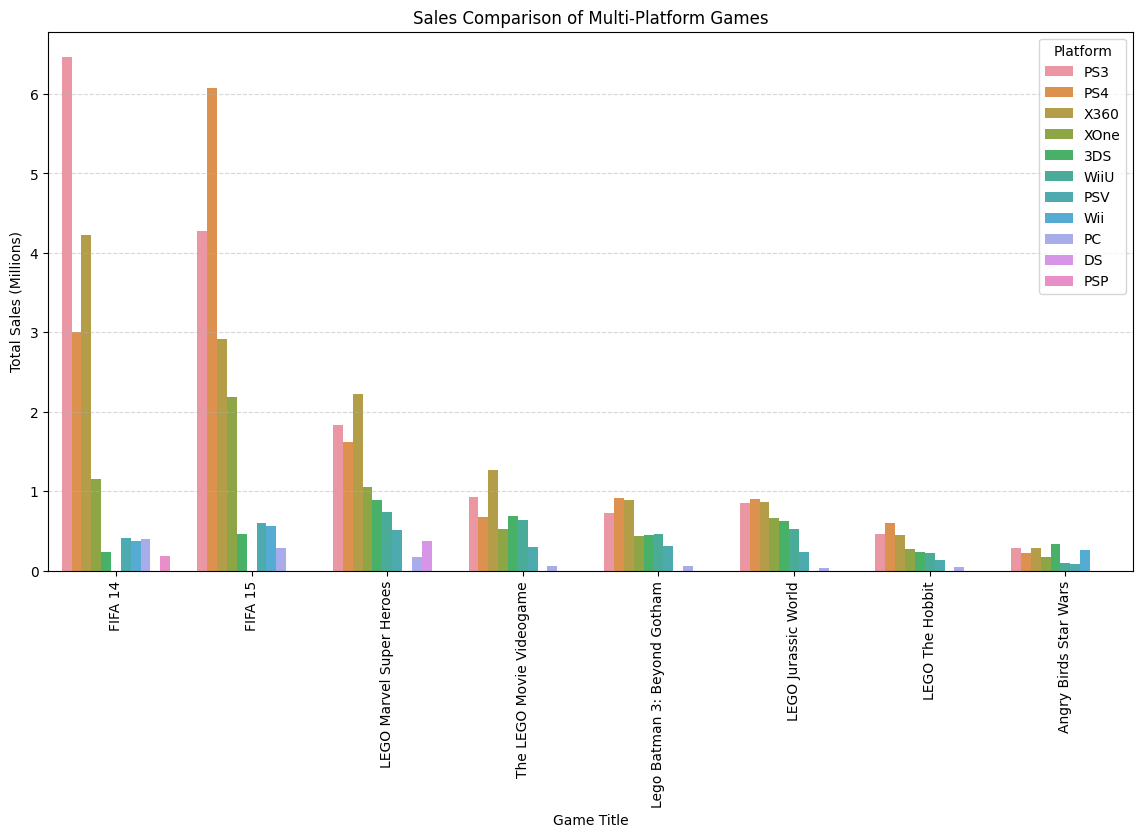

In [59]:
plt.figure(figsize=(14 , 7))
sns.barplot(x='name', y='total_sales', hue='platform', data= eight_platform_games)

plt.title('Sales Comparison of Multi-Platform Games')
plt.ylabel('Total Sales (Millions)')
plt.xlabel('Game Title')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Platform', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

As we can tell by this graph, for all games released on at least 8 different platforms, their greatest sales are on one of our more popular game systems which are either the PS3, PS4, or X360 except for Angry Birds Star Wars, which seems that sales on the 3DS were greatest.

Next we will take a look at the general distribution of games by genre to determine what the most profitable genres are.

In [60]:
# Step 1: group by genre and by the sum of the total sales
sales_by_genre = recent_era_games.groupby('genre', as_index=False)['total_sales'].sum()

#Step 2: print to ensure it was filtered properly
print(sales_by_genre)

           genre  total_sales
0         Action       321.87
1      Adventure        23.64
2       Fighting        35.31
3           Misc        62.82
4       Platform        42.63
5         Puzzle         3.17
6         Racing        39.89
7   Role-Playing       145.89
8        Shooter       232.98
9     Simulation        21.76
10        Sports       150.65
11      Strategy        10.08


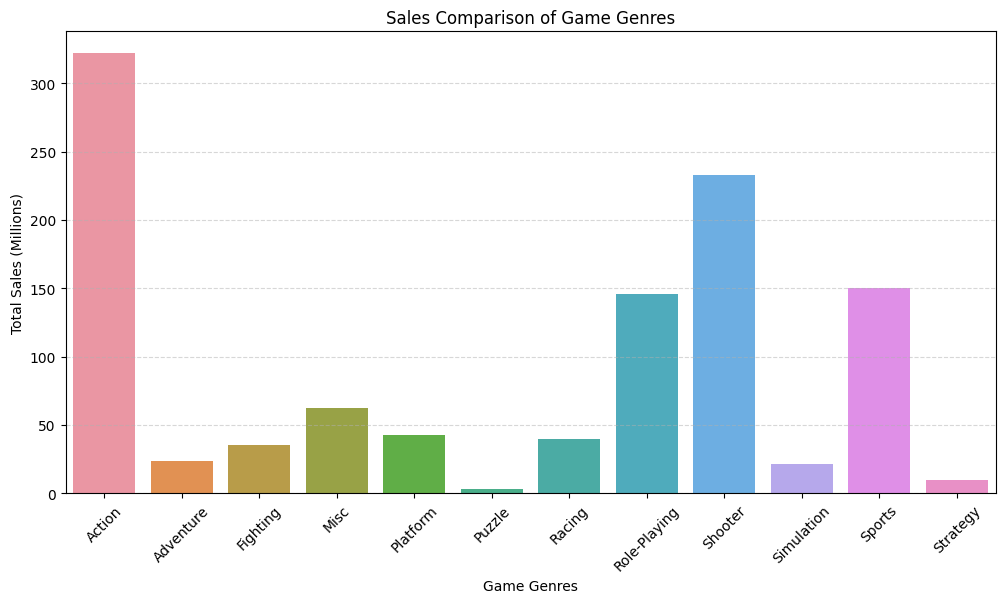

In [61]:
# Step 3: Create a Bar Chart to Compare the Sales by Genre
plt.figure(figsize=(12 , 6))
sns.barplot(x='genre', y='total_sales', data= sales_by_genre)

plt.title('Sales Comparison of Game Genres')
plt.ylabel('Total Sales (Millions)')
plt.xlabel('Game Genres')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Based on these results we can see that Action, Shooter, Sports and Role-Playing games are the most profitable, while Puzzle, Strategy and Adventure games are the least profitable. Based on this we can generally say that games are more fast pace seem to sell better than slower-paced, brain games. 

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>

Indeed here we have the most popular genre - Action (total revenue) but could you also check avg revenue per game/genre. 
</div>

Next we will compare the average revenue per game/genre.

In [62]:
# Step 1: group by genre and by the average total sales
av_sales_by_genre = recent_era_games.groupby('genre', as_index=False)['total_sales'].mean()

#Step 2: print to ensure it was filtered properly
print(av_sales_by_genre)

           genre  total_sales
0         Action     0.420196
1      Adventure     0.096490
2       Fighting     0.441375
3           Misc     0.405290
4       Platform     0.576081
5         Puzzle     0.186471
6         Racing     0.469294
7   Role-Playing     0.499623
8        Shooter     1.245882
9     Simulation     0.350968
10        Sports     0.703972
11      Strategy     0.180000


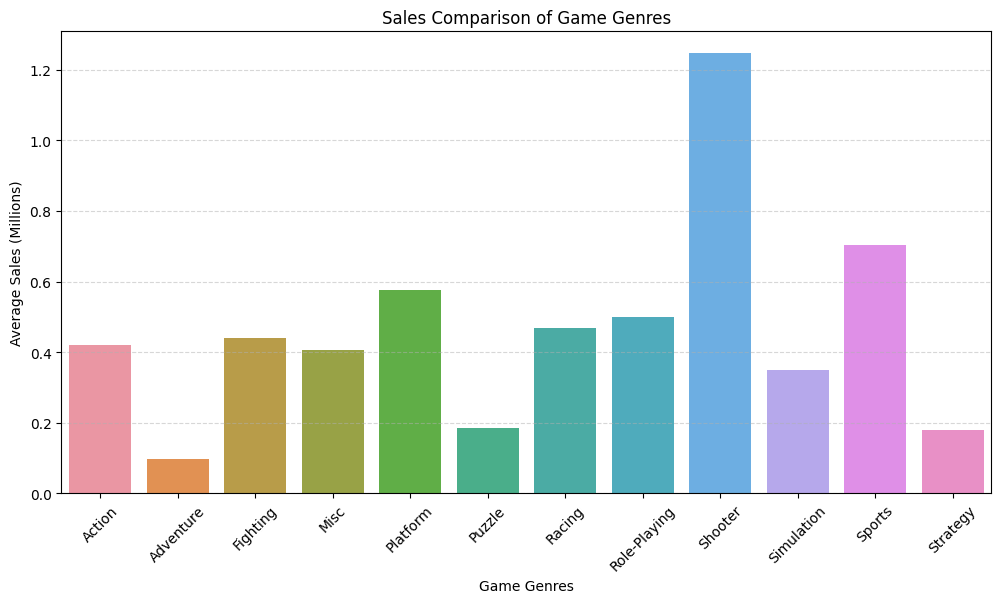

In [63]:
# Step 3: Create a Bar Chart to Compare the Average Sales by Genre
plt.figure(figsize=(12 , 6))
sns.barplot(x='genre', y='total_sales', data= av_sales_by_genre)

plt.title('Sales Comparison of Game Genres')
plt.ylabel('Average Sales (Millions)')
plt.xlabel('Game Genres')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

When looking at the average sales per genre we can see that shooter games and sports games have the highest average sales. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
I agree 👏 Thank you for extending this part. 

# Step 4 - Creating User Profiles By Region

We want to look at the top 5 selling platforms, the top 5 selling genres, and determine how ESRB ratings affect sales by region.  We will build profiles by region based around these 3 areas and then compare the regional data.

## North America (NA) profile

In [64]:
# Step 1: Group NA sales by platform
na_platform_sales = recent_era_games.groupby('platform')['na_sales'].sum().sort_values(ascending = False).reset_index()

#Step 2: confirm it was filtered correctly
print(na_platform_sales)

   platform  na_sales
0       PS4    108.74
1      XOne     93.12
2      X360     81.66
3       PS3     63.50
4       3DS     38.20
5      WiiU     29.21
6        PC     11.11
7       Wii      6.56
8       PSV      5.04
9        DS      0.57
10      PSP      0.00


In [65]:
#Step 3: Filter out the top 5
top_5_na_platforms = na_platform_sales.head(5) #since we sorted our values by na_sales originally, the first 5 on our list will be the top selling

#Step 4: Print the NA top selling platforms
print(top_5_na_platforms)

  platform  na_sales
0      PS4    108.74
1     XOne     93.12
2     X360     81.66
3      PS3     63.50
4      3DS     38.20


In [66]:
# Step 1: Group NA sales by Genre
na_genre_sales = recent_era_games.groupby('genre')['na_sales'].sum().sort_values(ascending = False).reset_index()

#Step 2: confirm it was filtered correctly
print(na_genre_sales)

           genre  na_sales
0         Action    126.05
1        Shooter    109.74
2         Sports     65.27
3   Role-Playing     46.40
4           Misc     27.49
5       Platform     18.14
6       Fighting     15.55
7         Racing     12.96
8      Adventure      7.14
9     Simulation      4.86
10      Strategy      3.28
11        Puzzle      0.83


In [67]:
#Step 3: Filter out the top 5
top_5_na_genres = na_genre_sales.head(5) #since we sorted our values by na_sales originally, the first 5 on our list will be the top selling

#Step 4: Print the NA top selling platforms
print(top_5_na_genres)

          genre  na_sales
0        Action    126.05
1       Shooter    109.74
2        Sports     65.27
3  Role-Playing     46.40
4          Misc     27.49


In [68]:
# Step 1: Group NA sales by ESRB rating
na_rating_sales = recent_era_games.groupby('rating')['na_sales'].sum().sort_values(ascending = False).reset_index()

#Step 2: confirm it was filtered correctly
print(na_rating_sales)

    rating  na_sales
0        M    165.21
1  unknown     89.42
2        E     79.05
3     E10+     54.24
4        T     49.79


## Europe (EU) profile

In [69]:
# Step 1: Group EU sales by platform
eu_platform_sales = recent_era_games.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).reset_index()

#Step 2: confirm it was filtered correctly
print(eu_platform_sales)

#Step 3: Filter out the top 5
top_5_eu_platforms = eu_platform_sales.head(5) #since we sorted our values by eu_sales originally, the first 5 on our list will be the top selling

#Step 4: Print the EU top selling platforms
print(top_5_eu_platforms)

   platform  eu_sales
0       PS4    141.09
1       PS3     67.81
2      XOne     51.59
3      X360     42.52
4       3DS     30.96
5        PC     25.36
6      WiiU     19.85
7       PSV      6.10
8       Wii      5.93
9        DS      0.85
10      PSP      0.17
  platform  eu_sales
0      PS4    141.09
1      PS3     67.81
2     XOne     51.59
3     X360     42.52
4      3DS     30.96


In [70]:
# Step 1: Group EU sales by Genre
eu_genre_sales = recent_era_games.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).reset_index()

#Step 2: confirm it was filtered correctly
print(eu_genre_sales)

#Step 3: Filter out the top 5
top_5_eu_genres = eu_genre_sales.head(5) #since we sorted our values by eu_sales originally, the first 5 on our list will be the top selling

#Step 4: Print the EU top selling platforms
print(top_5_eu_genres)

           genre  eu_sales
0         Action    118.13
1        Shooter     87.86
2         Sports     60.52
3   Role-Playing     36.97
4         Racing     20.19
5           Misc     20.04
6       Platform     15.58
7     Simulation     10.92
8       Fighting      8.55
9      Adventure      8.25
10      Strategy      4.22
11        Puzzle      1.00
          genre  eu_sales
0        Action    118.13
1       Shooter     87.86
2        Sports     60.52
3  Role-Playing     36.97
4        Racing     20.19


In [71]:
# Step 1: Group EU sales by ESRB rating
eu_rating_sales = recent_era_games.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).reset_index()

#Step 2: confirm it was filtered correctly
print(eu_rating_sales)

    rating  eu_sales
0        M    145.32
1        E     83.36
2  unknown     78.91
3     E10+     42.69
4        T     41.95


## Japan (JP) profile

In [72]:
# Step 1: Group JP sales by platform
jp_platform_sales = recent_era_games.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).reset_index()

#Step 2: confirm it was filtered correctly
print(jp_platform_sales)

#Step 3: Filter out the top 5
top_5_jp_platforms = jp_platform_sales.head(5) #since we sorted our values by na_sales originally, the first 5 on our list will be the top selling

#Step 4: Print the JP top selling platforms
print(top_5_jp_platforms)

   platform  jp_sales
0       3DS     67.81
1       PS3     23.35
2       PSV     18.59
3       PS4     15.96
4      WiiU     10.88
5       PSP      3.29
6      X360      0.51
7      XOne      0.34
8       Wii      0.05
9        DS      0.00
10       PC      0.00
  platform  jp_sales
0      3DS     67.81
1      PS3     23.35
2      PSV     18.59
3      PS4     15.96
4     WiiU     10.88


In [73]:
# Step 1: Group JP sales by Genre
jp_genre_sales = recent_era_games.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).reset_index()

#Step 2: confirm it was filtered correctly
print(jp_genre_sales)

#Step 3: Filter out the top 5
top_5_jp_genres = jp_genre_sales.head(5) #since we sorted our values by jp_sales originally, the first 5 on our list will be the top selling

#Step 4: Print the EU top selling platforms
print(top_5_jp_genres)

           genre  jp_sales
0   Role-Playing     51.04
1         Action     40.49
2           Misc      9.20
3       Fighting      7.65
4        Shooter      6.61
5      Adventure      5.82
6         Sports      5.41
7       Platform      4.79
8     Simulation      4.52
9         Racing      2.30
10      Strategy      1.77
11        Puzzle      1.18
          genre  jp_sales
0  Role-Playing     51.04
1        Action     40.49
2          Misc      9.20
3      Fighting      7.65
4       Shooter      6.61


In [74]:
# Step 1: Group JP sales by ESRB rating
jp_rating_sales = recent_era_games.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).reset_index()

#Step 2: confirm it was filtered correctly
print(jp_rating_sales)

    rating  jp_sales
0  unknown     85.05
1        T     20.59
2        E     15.14
3        M     14.11
4     E10+      5.89


Now that we have profiles for each region analyzing sales by platform, genres and ESRB rating, we can compare how they differ by region.

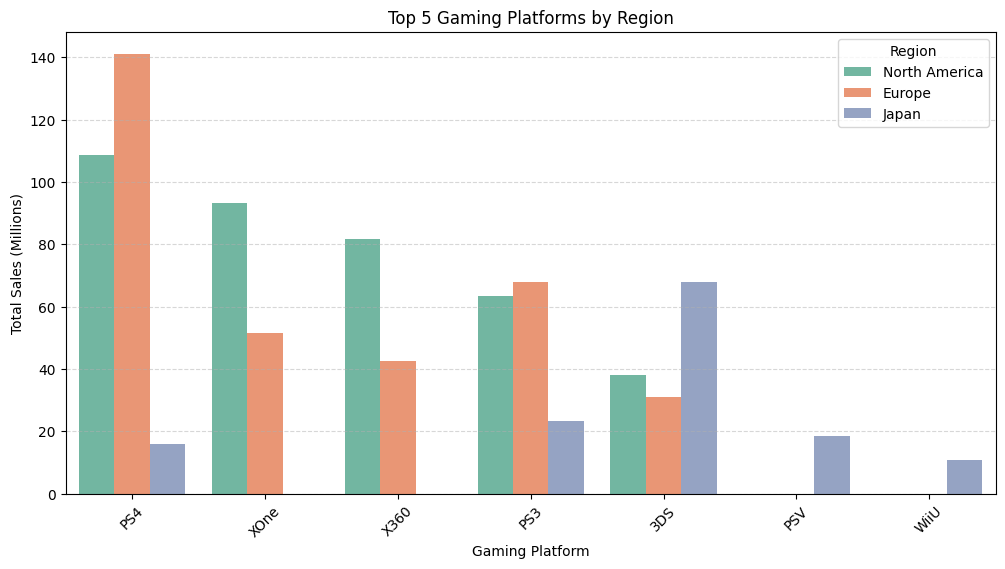

In [75]:
#Bar Graph Comparing Top 5 Platforms by Region

# Step 1: Rename sales columns for clarity
top_5_na_platforms = top_5_na_platforms.rename(columns={'na_sales': 'sales'})
top_5_na_platforms['region'] = 'North America'

top_5_eu_platforms = top_5_eu_platforms.rename(columns={'eu_sales': 'sales'})
top_5_eu_platforms['region'] = 'Europe'

top_5_jp_platforms = top_5_jp_platforms.rename(columns={'jp_sales': 'sales'})
top_5_jp_platforms['region'] = 'Japan'

# Step 2: Combine all three datasets into one
combined_sales = pd.concat([top_5_na_platforms, top_5_eu_platforms, top_5_jp_platforms])

# Step 3: Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='platform', y='sales', hue='region', data=combined_sales, palette='Set2')

# Step 4: Add labels and title
plt.title('Top 5 Gaming Platforms by Region')
plt.xlabel('Gaming Platform')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper right')

# Step 5: Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

When comparing these we can see that the top gaming platforms used in Japan have very little overlap with the top gaming platforms in North America and Europe.  The top gaming platforms in Japan are all Nintendo and Playstation (Sony) which are Japanese companies, while Microsoft (the company that makes Xbox gaming stations) is an American company, which could explain why it is more popular in North America and Europe. 

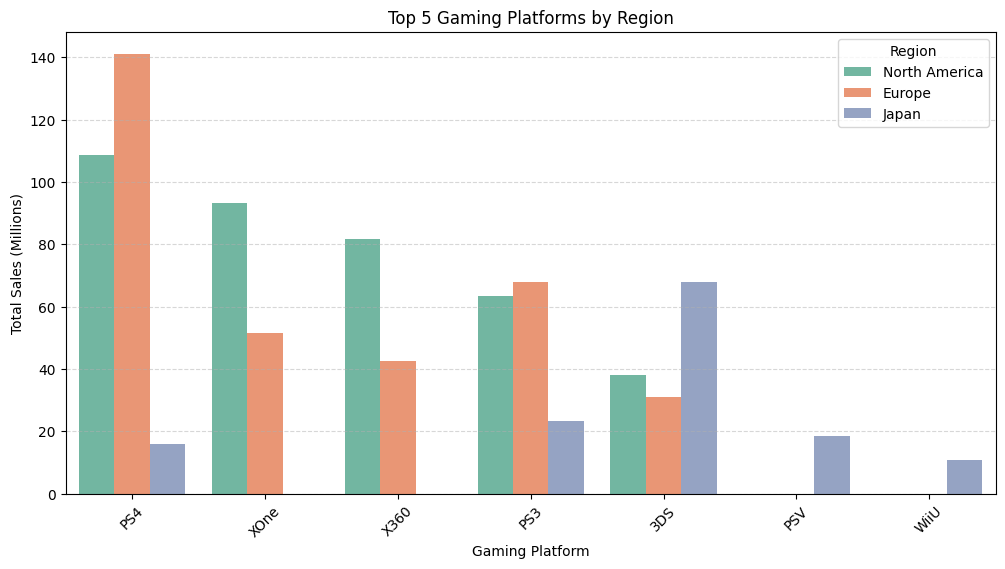

In [76]:

# Step 1: Rename sales columns for clarity
top_5_na_platforms = top_5_na_platforms.rename(columns={'na_sales': 'sales'})
top_5_na_platforms['region'] = 'North America'

top_5_eu_platforms = top_5_eu_platforms.rename(columns={'eu_sales': 'sales'})
top_5_eu_platforms['region'] = 'Europe'

top_5_jp_platforms = top_5_jp_platforms.rename(columns={'jp_sales': 'sales'})
top_5_jp_platforms['region'] = 'Japan'

# Step 2: Combine all three datasets into one
combined_sales = pd.concat([top_5_na_platforms, top_5_eu_platforms, top_5_jp_platforms])

# Step 3: Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='platform', y='sales', hue='region', data=combined_sales, palette='Set2')

# Step 4: Add labels and title
plt.title('Top 5 Gaming Platforms by Region')
plt.xlabel('Gaming Platform')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper right')

# Step 5: Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Again we see a lot of overlap in top genres in the North American and European markets.  There is more overlap in all three regions with Action games, Role-Playing games and Misc games being in the top 5 generes for all 3 regions. The only 2 genres that are popular in Japan and not North America and Europe are Platform and Adventure games, while instead Shooter and Sports games are much more popular in North America and Europe. 

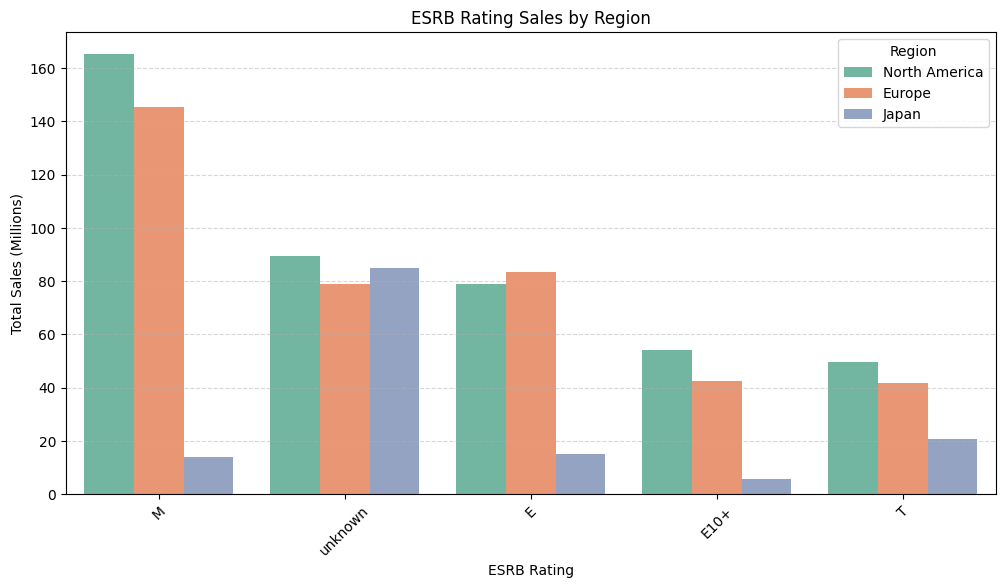

In [77]:
#Bar Graph Comparing ESRB Rating Sales by Region

# Step 1: Rename sales columns for clarity
na_rating_sales = na_rating_sales.rename(columns={'na_sales': 'sales'})
na_rating_sales['region'] = 'North America'

eu_rating_sales = eu_rating_sales.rename(columns={'eu_sales': 'sales'})
eu_rating_sales['region'] = 'Europe'

jp_rating_sales = jp_rating_sales.rename(columns={'jp_sales': 'sales'})
jp_rating_sales['region'] = 'Japan'

# Step 2: Combine all three datasets into one
combined_rating_sales = pd.concat([na_rating_sales, eu_rating_sales, jp_rating_sales])

# Step 3: Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='sales', hue='region', data=combined_rating_sales, palette='Set2')

# Step 4: Add labels and title
plt.title('ESRB Rating Sales by Region')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper right')

# Step 5: Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Generally, you can say that M rated games (M for Mature) are less likely to be purchased in Japan, but doesn't negatively impact sales at all in Europe or North America. Other than that you can generalize that ratings don't really impact sales as the unknown category is very popular in all 3 regions. 

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>

Looks great! 

As a second approach you could also arrange subplots using plotly in the following way: 
    
```
# Create individual pie charts with Plotly Express
fig_jp = px.pie(jpesrb_sort, values='jp_sales', names='rating', title='ESRB-JP')
fig_eu = px.pie(euesrb_sort, values='eu_sales', names='rating', title='ESRB-EU')
fig_na = px.pie(naesrb_sort, values='na_sales', names='rating', title='ESRB-NA')

# Create a subplot grid with 1 row and 3 columns
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# Add each pie chart to the subplot
fig.add_trace(fig_jp.data[0], row=1, col=1)
fig.add_trace(fig_eu.data[0], row=1, col=2)
fig.add_trace(fig_na.data[0], row=1, col=3)

# Update layout to show the titles properly
fig.update_layout(title_text="ESRB Ratings Comparison", showlegend=False)

# Show the combined plot
fig.show()
```

# Step 5 - Testing Hypotheses
1. Average User Ratings of the Xbox One and PC Platforms are the same

For this hypothesis the null and alternative hypotheses we will be testing are:

H0 = the mean user ratings for xone = the mean user ratings for pc
H1 = the mean user ratings for xone =! the mean user ratings for pc

To test this first we will have to get 2 arrays.  One the list of means for user ratings for xone games and one for the means of user ratings for pc games. 

In [78]:
# Get array of the user scores for xone 

# Step 1: Filter data for Xbox One 
xone_user_scores = recent_era_games[recent_era_games['platform'] == 'XOne']['user_score']
print(xone_user_scores)

#Step 2: Create the array 
xone_array = np.array(xone_user_scores)
print(xone_array[:5])

99       7.13
165      7.90
179      5.40
242      6.40
270      6.20
         ... 
16630    8.20
16643    6.60
16645    7.13
16660    6.70
16672    7.13
Name: user_score, Length: 247, dtype: float64
[7.13 7.9  5.4  6.4  6.2 ]


In [79]:
# Get array of the user scores for pc 

# Step 1: Filter data for pc 
pc_user_scores = recent_era_games[recent_era_games['platform'] == 'PC']['user_score']
print(pc_user_scores)

#Step 2: Create the array 
pc_array = np.array(pc_user_scores)
print(pc_array[:5])

458      3.90
1095     7.90
1351     2.20
1437     6.00
1530     5.40
         ... 
16509    7.90
16518    1.40
16617    7.13
16631    7.13
16692    7.60
Name: user_score, Length: 189, dtype: float64
[3.9 7.9 2.2 6.  5.4]


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
It is sufficient to print only last 5/10 values of the array `print(pc_array[:5])`

Now that we have the arrays we can test the hypothesis.  We will use an significance level of 0.05.  5% is a common threshold of statistical significance and then if our result is greater than this it will provide strong evidence that we should NOT reject the null hypothesis.

In [80]:
alpha = 0.05

results = st.ttest_ind(xone_array, pc_array, equal_var=False)# your code: test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue)# your code: print the p-value you get)

if results.pvalue <alpha: # your code: compare the p-value you get with the significance level):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.06790835070294682
We can't reject the null hypothesis


Based on the result we are unable to reject the null hypothesis. So we can't reject the possibility that the mean user scores for XONE games and PC games are equal.

2. Average user ratings for the Action and Sports genres are different.

For this hypothesis the null and alternative hypotheses we will be testing are:

H0 = the mean user ratings for action games = the mean user ratings for sports games 
H1 = the mean user ratings for action games =! the mean user ratings for sports games

To test this first we will have to get 2 arrays. One the list of means for user ratings for xone games and one for the means of user ratings for pc games.

In [81]:
# Build arrays for user scores for Action games and Sports games

# Step 1: Filter data for Xbox One 
action_user_scores = recent_era_games[recent_era_games['genre'] == 'Action']['user_score']
print(action_user_scores)
print()
sports_user_scores = recent_era_games[recent_era_games['genre'] == 'Sports']['user_score']
print(sports_user_scores)

print()

#Step 2: Create the arrays 
action_array = np.array(action_user_scores)
print(action_array[:5])
print()
sports_array = np.array(sports_user_scores)
print(sports_array[:5])

16       8.20
23       8.10
42       8.30
149      9.10
165      7.90
         ... 
16680    7.13
16691    7.13
16692    7.60
16699    7.13
16710    7.13
Name: user_score, Length: 766, dtype: float64

77       4.30
94       5.00
126      4.30
143      5.70
264      4.50
         ... 
16428    7.13
16450    4.50
16518    1.40
16638    7.13
16643    6.60
Name: user_score, Length: 214, dtype: float64

[8.2 8.1 8.3 9.1 7.9]

[4.3 5.  4.3 5.7 4.5]


Now that we have the arrays we can test the hypothesis.  We will again use a significance level of 0.05 to give us good confidence on if we can reject the null hypothesis or not.

In [82]:
alpha = 0.05

results = st.ttest_ind(sports_array, action_array, equal_var=False)# your code: test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue)# your code: print the p-value you get)

if results.pvalue <alpha: # your code: compare the p-value you get with the significance level):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.3804222192274082e-20
We reject the null hypothesis


Since our p-value is MUCH greater than our level of significance we definitely cannot reject the null hypothesis that the average ratings for Action and Sports games are the same.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- Everything is correct here. Hypotheses have been formulated correctly. 
- Your conclusions based on the results are also correct.
- You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)
    

# Conclusion

In conclusion, we can use this data to determine what games and platforms we want to sell.  We can see while overall game and platform sales were downtrending in 2016, the greatest sales were still to be had on the newest platforms such as the PS4 and XOne.  We could also see that Sony and Nintendo platforms may have a larger reach as they are popular in North America, Europe as well as Japan, but Microsoft consoles sell very well in North America and Europe.  Based on the regional data we can also see that North America does have the greatest sales overall, so focusing on this region may be beneficial.  Additionally, we have done multiple analyses that user and professional reviews don't have significant impacts on game sales and likely shouldn't spend much marketing time there.  Utilizing marketing around popular genres and consoles per region can likely also have a positive impact on sales. Utilizing all of this data can help create the best plan to maximize profits for Ice in 2017.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Thank you for submitting your project! I really enjoyed reviewing it and I impressed by the results that you have accomplished. 
    
    
It is great that you added both overall and interim  conclusions after each section in your project. 
    
Overall, you provided correct and very detailed conclusions and insights based on your analysis.
    



Thank you for all the feedback.  Let me know how it looks after the revisions.  I especially appreciate the other options for graphs or analysis, when mine wasn't exactly wrong, but it is good to see other ways of doing. - Thanks again!

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

Very happy that smth was useful 😇 And great improvements in your analysis and implementation of the suggested changes. Keep building on these adjustments as you move forward with future projects.

